In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# ------------------------------------------------------------
# BASIC POPULATION SETTINGS
# ------------------------------------------------------------
N = 1000          # Total population
I0 = 1            # Initial infected people
R0 = 0            # Initial recovered people
S0 = N - I0 - R0  # Initial susceptible people

In [23]:
# ------------------------------------------------------------
# TIME SETTINGS
# ------------------------------------------------------------
days = 180
time = np.arange(days)

In [24]:
# -------------------------------
# TIME SETTINGS
# -------------------------------
days = 160
time = np.arange(days)

In [25]:
# ------------------------------------------------------------
# FUNCTION: SIR MODEL SIMULATION
# ------------------------------------------------------------
def run_sir_model(beta, gamma, vaccination_rate=0.0):
    """
    beta  : infection rate
    gamma : recovery rate
    vaccination_rate : fraction of susceptible vaccinated per day
    """

    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)

    S[0], I[0], R[0] = S0, I0, R0

    for t in range(1, days):

        # New infections based on probability
        new_infected = beta * S[t-1] * I[t-1] / N

        # New recoveries
        new_recovered = gamma * I[t-1]

        # Vaccination reduces susceptible population
        vaccinated = vaccination_rate * S[t-1]

        # Update populations
        S[t] = S[t-1] - new_infected - vaccinated
        I[t] = I[t-1] + new_infected - new_recovered
        R[t] = R[t-1] + new_recovered + vaccinated

    return S, I, R

In [26]:
# ------------------------------------------------------------
# SCENARIO 1: NORMAL EPIDEMIC (NO CONTROL)
# ------------------------------------------------------------
beta_normal = 0.35
gamma_normal = 0.1

S1, I1, R1 = run_sir_model(beta_normal, gamma_normal)

In [27]:
# ------------------------------------------------------------
# SCENARIO 2: LOCKDOWN (LOWER INFECTION RATE)
# ------------------------------------------------------------
beta_lockdown = 0.18
gamma_lockdown = 0.1

S2, I2, R2 = run_sir_model(beta_lockdown, gamma_lockdown)


# ------------------------------------------------------------
# SCENARIO 3: VACCINATION STRATEGY
# ------------------------------------------------------------
beta_vaccine = 0.35
gamma_vaccine = 0.1
vaccination_rate = 0.02   # 2% vaccinated per day

S3, I3, R3 = run_sir_model(beta_vaccine, gamma_vaccine, vaccination_rate)


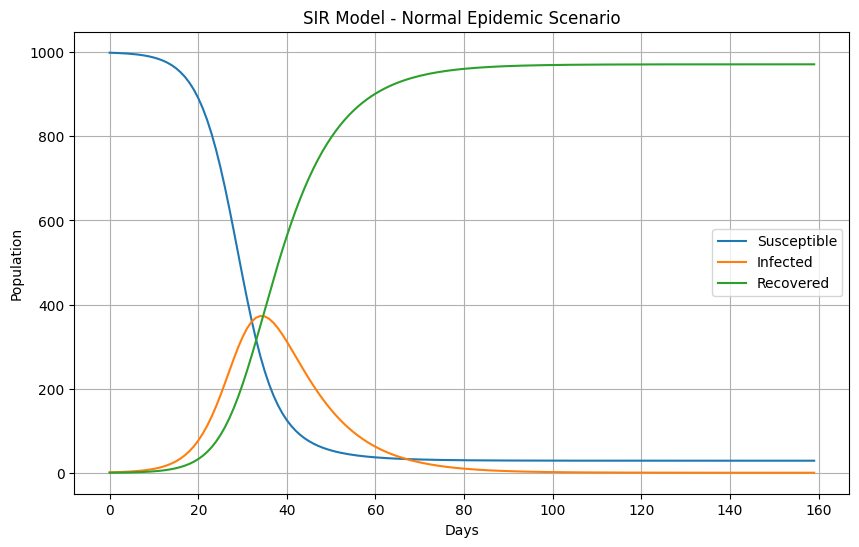

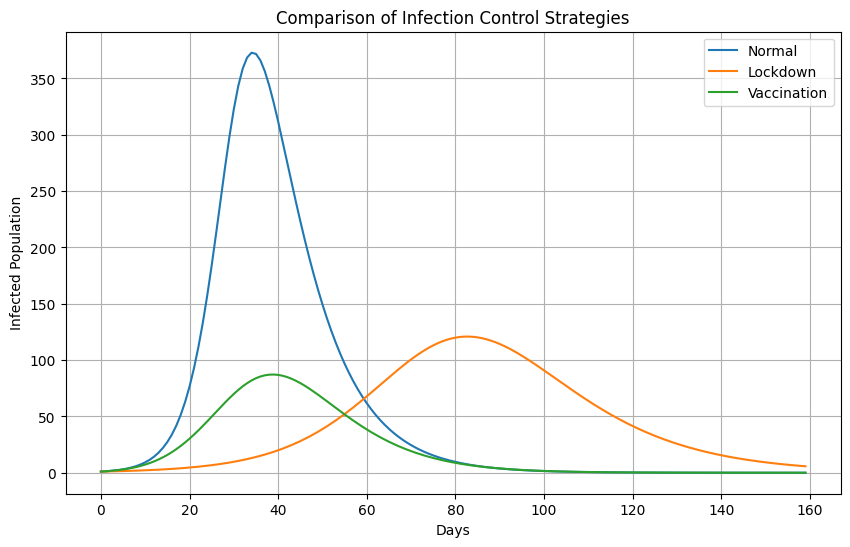

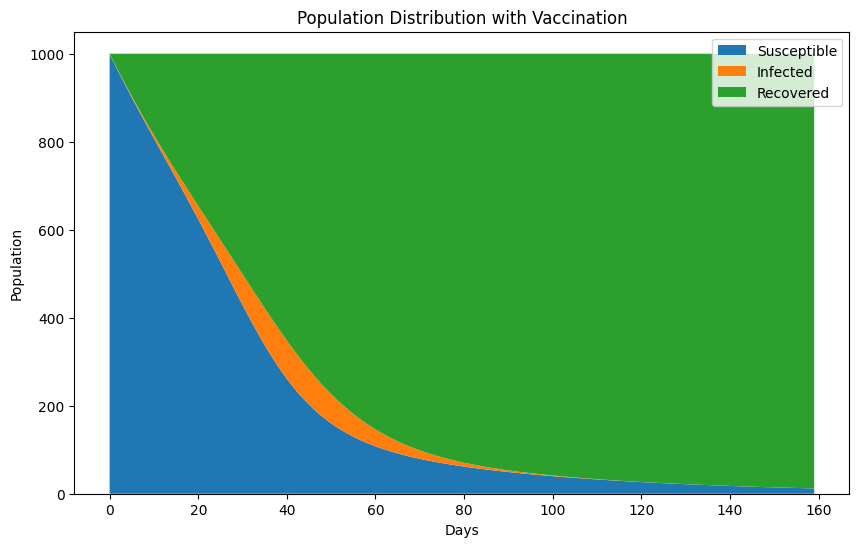

In [28]:
# ------------------------------------------------------------
# VISUALIZATION 1: SIR CURVES (NORMAL CASE)
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(time, S1, label="Susceptible")
plt.plot(time, I1, label="Infected")
plt.plot(time, R1, label="Recovered")

plt.title("SIR Model - Normal Epidemic Scenario")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------
# VISUALIZATION 2: COMPARISON OF INFECTED CURVES
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(time, I1, label="Normal")
plt.plot(time, I2, label="Lockdown")
plt.plot(time, I3, label="Vaccination")

plt.title("Comparison of Infection Control Strategies")
plt.xlabel("Days")
plt.ylabel("Infected Population")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------
# VISUALIZATION 3: AREA CHART (POPULATION DISTRIBUTION)
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.stackplot(time, S3, I3, R3, labels=["Susceptible", "Infected", "Recovered"])

plt.title("Population Distribution with Vaccination")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend(loc="upper right")
plt.show()

In [29]:
# ------------------------------------------------------------
# ANALYSIS: PEAK INFECTION DETAILS
# ------------------------------------------------------------
peak_day = np.argmax(I1)
peak_infected = np.max(I1)

print("PEAK INFECTION ANALYSIS (Normal Scenario)")
print("----------------------------------------")
print(f"Peak Day           : {peak_day}")
print(f"Maximum Infected   : {int(peak_infected)} people")
print(f"Total Population   : {N}")

PEAK INFECTION ANALYSIS (Normal Scenario)
----------------------------------------
Peak Day           : 34
Maximum Infected   : 372 people
Total Population   : 1000
